# House Price Prediction - Linear Regression
## USA Housing Dataset Analysis

### Step 1: Import Required Libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2: Load CSV Data and Explore Dataset

In [12]:
df = pd.read_csv('USA_Housing.csv')
print(df.head())

   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Eli

### View General Information

In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB
None


### View Statistical Summary

In [14]:
print(df.describe())

       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562388             5.322283                   6.299250   
50%        68804.286404             5.970429                   7.002902   
75%        75783.338666             6.650808                   7.665871   
max       107701.748378             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min                        2.000000       172.61

### Check Correlation Between Data Columns

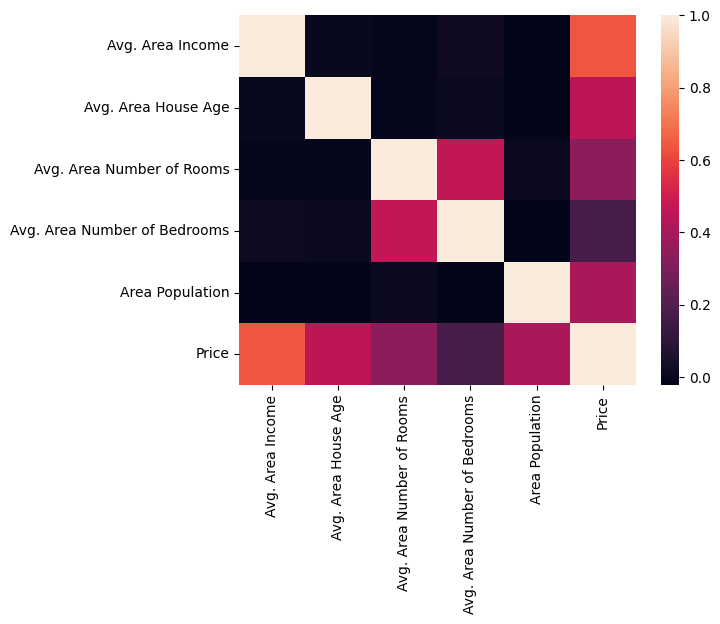

In [15]:
sns.heatmap(df.corr(numeric_only=True))
plt.show()

### Separate Features (X) and Target (y)

In [16]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
        'Avg. Area Number of Bedrooms', 'Area Population']]
y = df['Price']

### Split Dataset into Train and Test Sets (80% train, 20% test)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Create and Train Linear Regression Model

In [18]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Step 4: Use Model for Predictions

In [19]:
predictions = lm.predict(X_test)
print("Predictions:", predictions[:5])

Predictions: [1257919.729097    822112.41884197 1740669.05865495  972452.12917494
  993422.26329315]


### Predict for a Specific House

In [20]:
pre1 = lm.predict([X_test.iloc[0]])
print("Result =", pre1)

Result = [1257919.729097]


c:\Users\PC LENOVO\Downloads\ML\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Predict with 2D Array Containing 1 Element

In [21]:
pre2 = lm.predict([[66774.995817, 5.717143, 7.795215, 4.320000, 36788.980327]])
print("Result 2 =", pre2)

Result 2 = [1257919.71744578]


c:\Users\PC LENOVO\Downloads\ML\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### View Coefficients and Interpret

In [22]:
# print the intercept
print("Intercept:", lm.intercept_)

# print coefficients
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

Intercept: -2640441.3997814017
                                Coefficient
Avg. Area Income                  21.566696
Avg. Area House Age           165453.042478
Avg. Area Number of Rooms     120499.839093
Avg. Area Number of Bedrooms    1999.785336
Area Population                   15.340604


### Evaluate Model with Metrics

In [23]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 81305.23300085647
MSE: 10100187858.864885
RMSE: 100499.69083964829


### Visualize Prediction Results

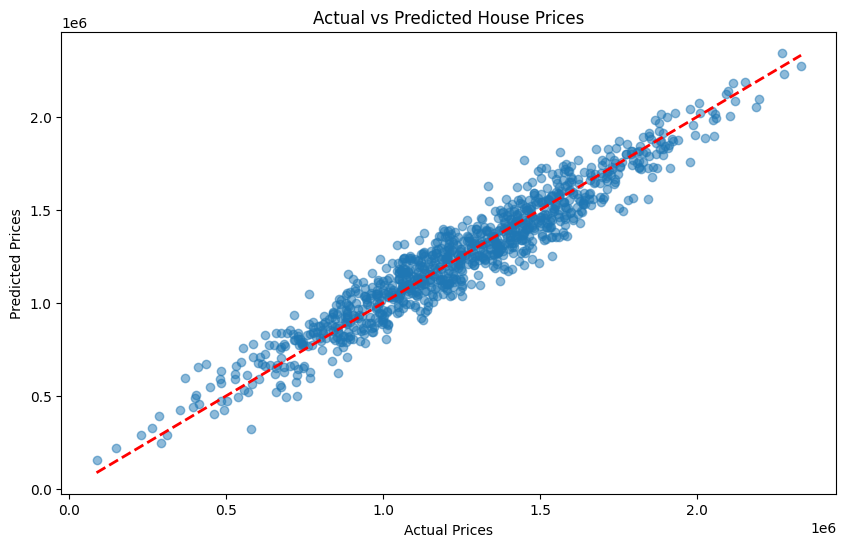

In [24]:
# Scatter plot: Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.show()

### Residuals Distribution (Errors)

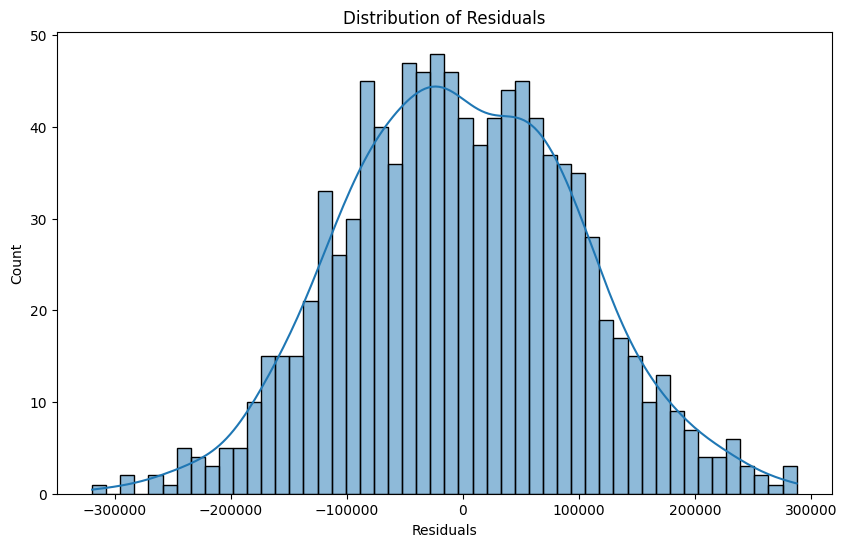

In [25]:
residuals = y_test - predictions
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=50, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

### Save Model with Pickle

In [26]:
import pickle

modelname = "housingmodel.zip"
pickle.dump(lm, open(modelname, 'wb'))
print(f"Model saved as {modelname}")

Model saved as housingmodel.zip


### Load Saved Model and Use It

In [27]:
modelname = "housingmodel.zip"
trainedmodel = pickle.load(open(modelname, 'rb'))
print("Model loaded successfully")

Model loaded successfully


### Use Loaded Model for Predictions

In [28]:
# Get features from trained model
features = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
            'Avg. Area Number of Bedrooms', 'Area Population']

# View coefficients
coeff_df = pd.DataFrame(trainedmodel.coef_, features, columns=['Coefficient'])
print(coeff_df)

                                Coefficient
Avg. Area Income                  21.566696
Avg. Area House Age           165453.042478
Avg. Area Number of Rooms     120499.839093
Avg. Area Number of Bedrooms    1999.785336
Area Population                   15.340604


### Predict with Loaded Model

In [29]:
prediction = trainedmodel.predict([[66774.995817, 5.717143, 7.795215, 4.320000, 36788.980327]])
print("Result =", prediction)

Result = [1257919.71744578]


c:\Users\PC LENOVO\Downloads\ML\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### R² Score - Evaluate Model Accuracy

In [30]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
print(f"R² Score: {r2:.4f}")
print(f"Model explains {r2*100:.2f}% of the variance in house prices")

R² Score: 0.9212
Model explains 92.12% of the variance in house prices
